# Monkey ECoG Data looking at the CV

Goal: 
examine the difference in coefficient varience to look at the differences within and between each states.

Set Up

In [2]:
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

Grabbing data

In [15]:
def setdata(session_num,chan):
    data_path = "\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\" %(session_num)
    matfile = io.loadmat(data_path + 'ECoG_ch%d.mat'%(chan), squeeze_me=True)
    timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
    data = matfile['ECoGData_ch%d'%(chan)]
    return data

In [29]:
def conditionInfo(timefile):
    print(timefile['ConditionLabel'])

In [4]:
def setTimeFile(session_num):
    data_path = "\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\" %(session_num)
    timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
    return timefile

In [30]:
# get an idea of the conditions in each session
timefile1 = setTimeFile(1)
conditionInfo(timefile1)
timefile2 = setTimeFile(2)
conditionInfo(timefile2)
timefile3 = setTimeFile(3)
conditionInfo(timefile3)

['AwakeEyesOpened-Start' 'AwakeEyesOpened-End' 'AwakeEyesClosed-Start'
 'AwakeEyesClosed-End']
['AnestheticInjection' 'Anesthetized-Start' 'Anesthetized-End'
 'RecoveryEyesClosed-Start' 'RecoveryEyesClosed-End']
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']


In [19]:
def scv(data, timefile, start_ind, end_ind, figure_num):
    f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
    SP = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][start_ind]),np.where(f_time<timefile['ConditionTime'][end_ind]))]
    plt.figure(figure_num)
    plt.loglog((np.std(SP,axis=1)/np.mean(SP,axis=1))**2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('CV')

In [20]:
def psd(data,timefile,num,figure_num):
    f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
    plt.figure(figure_num)
    if num == 1:
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][2]),np.where(f_time<timefile['ConditionTime'][3]))],axis=1))
    elif (num == 2):
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][1]),np.where(f_time<timefile['ConditionTime'][2]))],axis=1))
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][3]),np.where(f_time<timefile['ConditionTime'][4]))],axis=1))
    elif num == 3:
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))

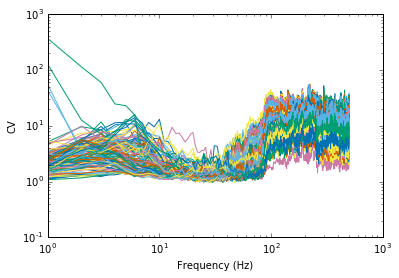

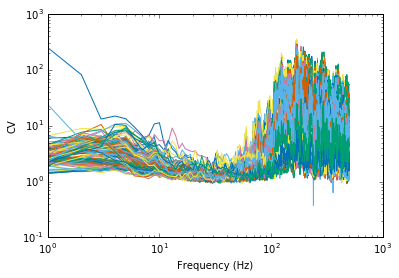

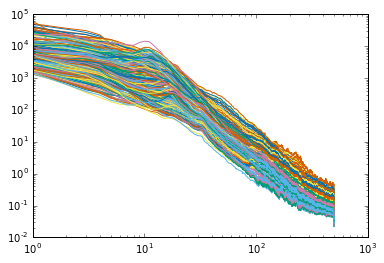

In [21]:
# session 1
for i in range(1,129):
    data = setdata(1,i)
    timefile = setTimeFile(1)
    # AwakeEyesOpened
    scv(data, timefile, 0, 1, 1)
    # AwakeEyesClosed
    scv(data, timefile, 2, 3, 2)
    psd(data, timefile, 1, 3)

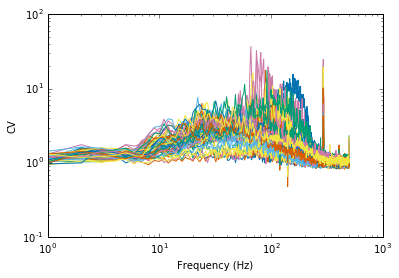

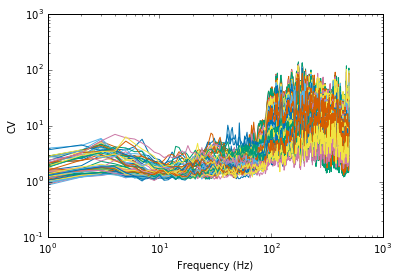

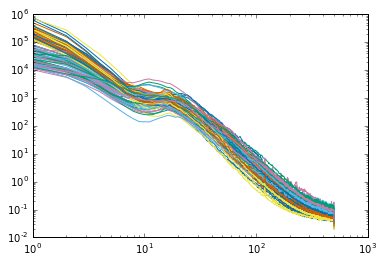

In [24]:
# session 2
# ch_63 is corrupted in session 2
for i in range(1,62) and range(64,129):
    data = setdata(2,i)
    timefile = setTimeFile(2)
    # Anesthetized-Start
    scv(data, timefile, 1, 2, 1)
    # RecoveryEyesClosed
    scv(data, timefile, 3, 4, 2)
    psd(data, timefile, 2, 3)

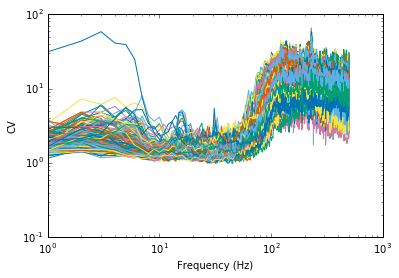

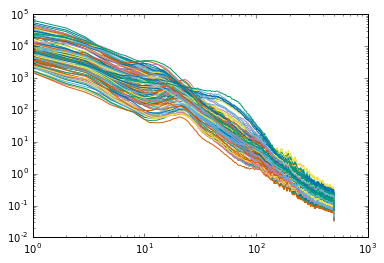

In [25]:
# session 3
for i in range(1,129):
    data = setdata(3,i)
    timefile = setTimeFile(3)
    # RecoveryEyesOpened
    scv(data, timefile, 0, 1, 1)
    psd(data,timefile, 3, 2)